## AUTHOR: ANIKET TANAJI DABADE
### SUB: POLYNOMIAL REGRESSION

#### TOPIC: Predict the Salary of Employees Based on Level of Employee in Organization.

In [1]:
#Importing all required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data Extraction- Uploading CSV file
data=pd.read_csv(r'C:\Users\admin\Desktop\DS\PRACTICE\Polynomial reg\VENTI_LEVEL_SALARY_STRUCTURE.csv')

In [3]:
#Data overview
data

,Position,Level,Salary
0,DET,1,25000
1,GET,1,35000
2,Junior Enginer- Sales,1,37000
3,Junior Enginer- Design,1,37000
4,Design Engineer,2,40000
5,Sr. Design Engineer,3,45000
6,Ass. Manager- Design,4,50000
7,Manager- Design,5,70000
8,Sales Engineer,2,40000
9,Sr. Sales Engineer,3,45000


In [4]:
data.shape

(23, 3)

In [5]:
data.head()

,Position,Level,Salary
0,DET,1,25000
1,GET,1,35000
2,Junior Enginer- Sales,1,37000
3,Junior Enginer- Design,1,37000
4,Design Engineer,2,40000


In [6]:
data.tail()

,Position,Level,Salary
18,HR Executive,4,60000
19,Sr. HR- Sales,5,75000
20,Vice Precident,7,120000
21,CEO,9,200000
22,Director,10,300000


In [7]:
# Finding if any null value is present in data set
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
data.isnull()

,Position,Level,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


There is no null value present in dataset. Therefore no need to add or replace values in data set. Available data set is perfect to perform further opearations.

In [9]:
# Importing Required ML libraries.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [10]:
x=data.iloc[:,1:2].values
x


array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 7],
       [ 6],
       [ 6],
       [ 8],
       [ 6],
       [ 1],
       [ 4],
       [ 5],
       [ 7],
       [ 9],
       [10]], dtype=int64)

In [11]:
y=data.iloc[:,2:].values
y

array([[ 25000],
       [ 35000],
       [ 37000],
       [ 37000],
       [ 40000],
       [ 45000],
       [ 50000],
       [ 70000],
       [ 40000],
       [ 45000],
       [ 50000],
       [ 70000],
       [110000],
       [ 90000],
       [ 90000],
       [100000],
       [ 90000],
       [ 35000],
       [ 60000],
       [ 75000],
       [120000],
       [200000],
       [300000]], dtype=int64)

Text(0.5, 1.0, 'Level vs Salary')

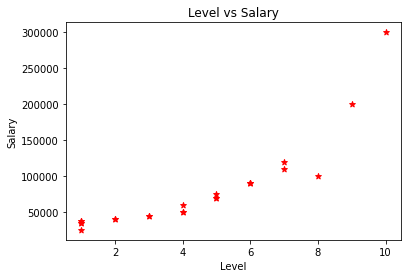

In [12]:
plt.scatter(x,y, marker='*',color='r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level vs Salary')


<AxesSubplot:>

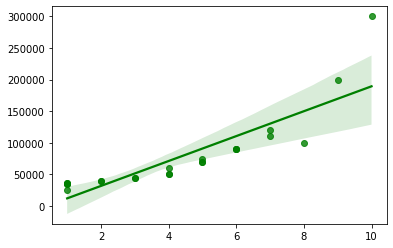

In [13]:
sns.regplot(x,y, color='g')

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [15]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [16]:
reg.predict([[8]]) #Put independent values to predict dependent value

array([[149894.99192246]])

In [17]:
reg.predict([[10]])

array([[189258.48142165]])

In [18]:
reg.score(x,y)

0.7374797663894395

Predicted Salary for Level 8 Employee is 149894.99192246.
Predicted Salary for Level 10 Employee is 189258.48142165 
We are not getting accurate predicted values with Linear Reg.

## POLYNOMIAL REGRESSION

In [19]:
poly_reg=PolynomialFeatures(degree=4) #change degree to get best fit i.e 2,3,4 etc
x_poly=poly_reg.fit_transform(x)


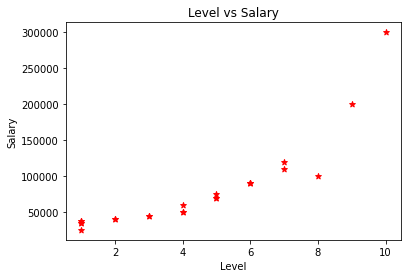

In [20]:
plt.scatter(x,y,marker='*', color='r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level vs Salary')
plt.show()


In [21]:
reg=LinearRegression()

In [22]:
reg.fit(x_poly, y)

LinearRegression()

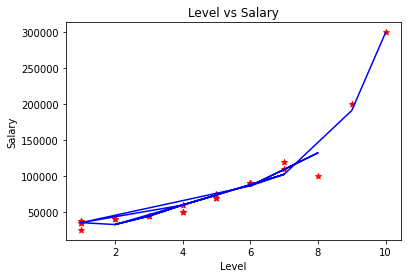

In [23]:
plt.scatter(x,y,marker='*', color='r') # Generating Scatter plot
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level vs Salary')
plt.plot(x,reg.predict(poly_reg.fit_transform(x)), color='blue')

In [24]:
reg.predict(poly_reg.fit_transform([[8]])) # Predicting values

array([[132158.53451748]])

In [25]:
reg.predict(poly_reg.fit_transform([[10]])) # We are getting much accurate predicted values with Polynomial Reg. (Degree=4)

array([[299464.71014753]])

Predicted Salary for Level 8 Employee is 132158.53451748
Predicted Salary for Level 10 Employee is 299464.71014753
We are getting much accurate predicted values with Polynomial Reg. (Degree=4)

In [26]:
reg.score(x_poly, y)

0.9768360418568616

FROM ABOVE SCORE ( 0.9768360418568616), WE CAN CONCLUDE THAT POLYNOMIAL REGRESSION WITH DEGREE=4 IS BEST SUITED.